## Fixed Income Securities

In [1]:
from scipy.optimize import minimize
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import date, datetime
import numpy_financial as npf
import seaborn as sns
%matplotlib inline
from scipy.stats import shapiro
from numpy.random import randn
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
import scipy.optimize as optimize

##  Consider a government Capital Indexed Inflation Linked Bond

### a. Compute the accrued interest.

In [2]:
# variáveis presentes
face_value = 25000
annual_coupon_rate = 0.0675
coupon_frequency = 2 #semi-annual
settlement_day = '21/9/2020' #since we are using western convention the settlement day had to be a business day
issue_day = '31/7/2020'
next_coupon_day = '31/1/2021'

# cálculo dos dias de vida útil da obrigação
u = dt.datetime.strptime(settlement_day, "%d/%m/%Y") - dt.datetime.strptime(issue_day, "%d/%m/%Y")
w = dt.datetime.strptime(next_coupon_day, "%d/%m/%Y") - dt.datetime.strptime(issue_day, "%d/%m/%Y")

# cálculo do juro corrido
accrued_interest = face_value * (annual_coupon_rate/coupon_frequency) * (u/w)
accrued_interest

238.45108695652172

### b. Simulate 1000 scenarios for the inflation rate curve and CPI index.

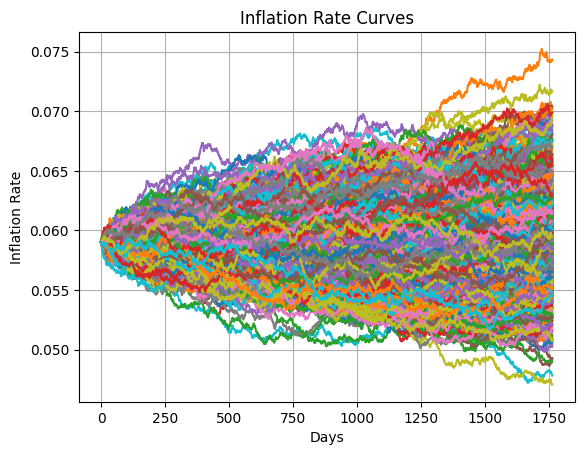

In [3]:
# variáveis presentes
settlement_day = '21/9/2020'
maturity_day = '21/7/2025'
CPI_issue = 237.14365
CPI_sett = 251.14721

# cálculo dos dias de vida útil da obrigação
start = dt.datetime.strptime(settlement_day, "%d/%m/%Y")
end = dt.datetime.strptime(maturity_day, "%d/%m/%Y")
M = (end - start).days

# cálculo da inflação no período zero
initial_inflation = (CPI_sett - CPI_issue)/CPI_issue

# cálculo de 1000 cenários para a curva de inflação
npr.seed(5)
u =  0.05321
sigma = 0.06358
paths = 1000
dt = 1 / M
S = np.zeros((M + 1, paths))
S[0,:] = initial_inflation
S[1:,:] = S[0,:] * np.exp((u - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * np.cumsum(npr.randn(M, paths),0))

# construção do gráfico
plt.plot(S)
plt.title('Inflation Rate Curves')
plt.xlabel('Days')
plt.ylabel('Inflation Rate')
plt.grid()

In [4]:
CPI_sett*(pd.DataFrame(S)+1)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,265.977694,265.977694,265.977694,265.977694,265.977694,265.977694,265.977694,265.977694,265.977694,265.977694,...,265.977694,265.977694,265.977694,265.977694,265.977694,265.977694,265.977694,265.977694,265.977694,265.977694
1,265.988033,265.970697,266.032798,265.972465,265.980585,266.013695,265.957725,265.964847,265.982337,265.970720,...,265.969019,265.964972,265.954155,265.971321,265.995384,265.996082,265.995489,265.976892,265.985241,265.980631
2,266.000232,265.979697,266.049025,265.971980,265.981125,266.046939,265.988325,265.919916,265.991742,265.979954,...,265.975030,265.979133,265.969942,265.948729,265.981495,266.027403,266.009446,265.992710,265.958631,265.902080
3,266.008630,266.031439,266.002584,265.978511,265.983718,265.999214,266.016334,265.924443,265.973953,265.991944,...,265.970952,265.991325,266.004944,265.959597,266.021990,266.048890,266.019674,266.028908,265.996728,265.911118
4,265.961697,266.060186,265.950938,265.941043,265.964950,265.980985,266.051380,265.956526,265.995256,266.006779,...,266.000994,265.960056,266.053350,265.959278,266.016741,266.022060,266.034737,266.053417,265.996154,265.926391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1760,266.792719,266.317019,266.428143,263.902919,266.846392,265.186607,265.480630,267.448707,266.077781,266.029719,...,266.032577,264.787029,266.929064,267.000779,265.841347,266.092221,266.654532,265.989850,266.118227,264.859935
1761,266.849824,266.351135,266.437399,263.892997,266.849524,265.211858,265.486126,267.421768,266.068524,266.007749,...,266.048055,264.822401,266.886900,266.958421,265.836007,266.080514,266.647128,265.997321,266.081211,264.834856
1762,266.843180,266.339585,266.432111,263.918021,266.824858,265.227823,265.480910,267.435675,266.100087,265.954050,...,266.026723,264.831373,266.915503,266.957432,265.825744,266.056137,266.629330,265.994815,266.075474,264.831001
1763,266.844483,266.344429,266.418067,263.921513,266.794542,265.226126,265.486348,267.400693,266.086355,265.925959,...,266.024627,264.841609,266.918140,266.942428,265.794123,266.071209,266.580414,266.017118,266.068380,264.827900


### c. For each scenario, compute the ILB cash flows and estimate its fair value.

In [5]:
#set payment days
coupon_dates = [date(2021,1,31),
                date(2021,7,31),
                date(2022,1,31),
                date(2022,7,31),
                date(2023,1,31),
                date(2023,7,31),
                date(2024,1,31),
                date(2024,7,31),
                date(2025,1,31),
                date(2025,7,21)
                ]                       

In [6]:
dates = pd.date_range('21/09/2020', '21/07/2025', freq='D')

/Users/riccardogurzu/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3398: UserWarning: Parsing '21/09/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/riccardogurzu/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3398: UserWarning: Parsing '21/07/2025' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
#compute inflation rates
inf_rate = pd.DataFrame(S, index = dates)
indexDate = [str(pd.to_datetime(i, format="%d/%m/%Y")) for i in inf_rate.index if i in coupon_dates]
inf_rate = inf_rate.loc[indexDate]
inf_rate

/var/folders/3w/sskgxwn55ts3qf_m36f4w5mm0000gn/T/ipykernel_26460/971948775.py:3: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  indexDate = [str(pd.to_datetime(i, format="%d/%m/%Y")) for i in inf_rate.index if i in coupon_dates]


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2021-01-31,0.057968,0.060281,0.057743,0.058617,0.059657,0.057496,0.061347,0.058893,0.059597,0.061311,...,0.060000,0.059705,0.059829,0.060406,0.059566,0.060024,0.061174,0.060348,0.058739,0.058799
2021-07-31,0.061028,0.060586,0.055638,0.056399,0.060406,0.059680,0.061025,0.058467,0.058863,0.060390,...,0.061163,0.059111,0.059816,0.058256,0.059020,0.061715,0.059565,0.062227,0.060782,0.058152
2022-01-31,0.060723,0.061069,0.055922,0.054240,0.060801,0.058934,0.062013,0.057757,0.059513,0.060429,...,0.060552,0.055963,0.061462,0.058335,0.058758,0.062559,0.058890,0.059826,0.060355,0.058555
2022-07-31,0.061436,0.058551,0.057725,0.054765,0.061696,0.057525,0.060780,0.059140,0.062629,0.062354,...,0.057870,0.054154,0.061028,0.060197,0.059615,0.060850,0.059654,0.058970,0.060696,0.056988
2023-01-31,0.062236,0.058323,0.057640,0.053560,0.061422,0.056556,0.060144,0.059630,0.062360,0.061692,...,0.057652,0.054610,0.059957,0.061491,0.058606,0.059894,0.061614,0.057335,0.060740,0.054358
2023-07-31,0.063584,0.060108,0.058003,0.053907,0.061856,0.056464,0.058203,0.059047,0.061488,0.062465,...,0.059461,0.053879,0.060548,0.061082,0.059033,0.060766,0.060665,0.056100,0.059618,0.054007
2024-01-31,0.064339,0.060751,0.062148,0.053179,0.062951,0.056482,0.057769,0.061206,0.061070,0.061502,...,0.059904,0.053377,0.060774,0.062455,0.059175,0.061977,0.059633,0.058289,0.061067,0.054977
2024-07-31,0.064846,0.061086,0.061977,0.052334,0.061828,0.056258,0.057378,0.061324,0.061967,0.059415,...,0.059710,0.053833,0.061834,0.064441,0.058151,0.061502,0.060305,0.058479,0.059721,0.053310
2025-01-31,0.063679,0.059916,0.060649,0.052058,0.061417,0.055913,0.057947,0.063410,0.060515,0.059289,...,0.059704,0.053775,0.062758,0.065095,0.058422,0.058889,0.060082,0.058162,0.058791,0.052565
2025-07-21,0.062569,0.060469,0.060815,0.050744,0.062360,0.056061,0.056939,0.064851,0.059491,0.058925,...,0.059213,0.054603,0.062906,0.063052,0.058420,0.059528,0.061410,0.059198,0.059482,0.054514


In [8]:
# cálculo dos cupões compensados pela inflação em 1000 cenários diferentes
coupon_with_inflation = (inf_rate + 1) * (annual_coupon_rate/coupon_frequency) * face_value
coupon_with_inflation.loc[coupon_with_inflation.index == '2025-07-21'] = coupon_with_inflation.loc[coupon_with_inflation.index == '2025-07-21'] + face_value
round(coupon_with_inflation.T, 2)

,2021-01-31,2021-07-31,2022-01-31,2022-07-31,2023-01-31,2023-07-31,2024-01-31,2024-07-31,2025-01-31,2025-07-21
0,892.66,895.24,894.98,895.59,896.26,897.40,898.04,898.46,897.48,25896.54
1,894.61,894.87,895.28,893.15,892.96,894.47,895.01,895.29,894.30,25894.77
2,892.47,890.69,890.93,892.46,892.38,892.69,896.19,896.04,894.92,25895.06
3,893.21,891.34,889.52,889.96,888.94,889.23,888.62,887.91,887.67,25886.57
4,894.09,894.72,895.05,895.81,895.58,895.94,896.86,895.92,895.57,25896.37
...,...,...,...,...,...,...,...,...,...,...
995,894.40,895.82,896.53,895.09,894.29,895.02,896.04,895.64,893.44,25893.98
996,895.37,894.01,893.44,894.08,895.74,894.94,894.07,894.63,894.44,25895.56
997,894.67,896.25,894.23,893.51,892.13,891.08,892.93,893.09,892.82,25893.70
998,893.31,895.03,894.67,894.96,895.00,894.05,895.27,894.14,893.36,25893.94


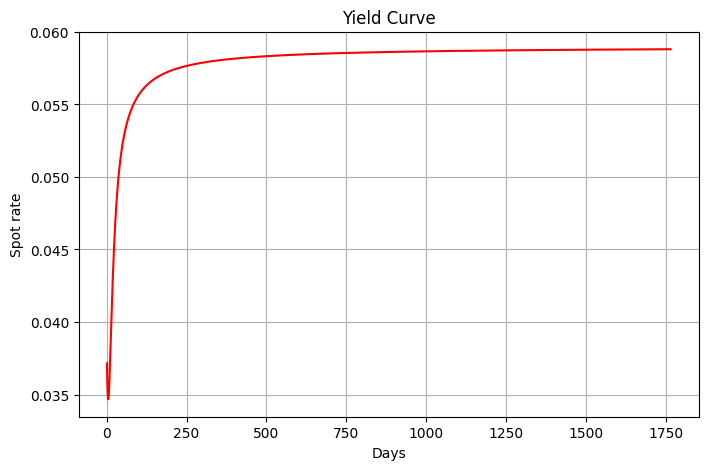

In [9]:
# variáveis presentes
p = 0.059, -0.016, -0.05, -0.01, 5.0, 0.5

# cálculo da yield curve através do modelo NSS
def nss(p, term):
    beta0, beta1, beta2, beta3, tau1, tau2 = p
    return (beta0
            +beta1*(1-np.exp(-term/tau1))/(term/tau1)
            +beta2*((1-np.exp(-term/tau1))/(term/tau1)-np.exp(-term/tau1))
            +beta3*((1-np.exp(-term/tau2))/(term/tau2)-np.exp(-term/tau2)))

plt.figure(figsize=(8,5))
xx = np.linspace(1, M, M)
nss_yc = np.array([nss(p, term) for term in xx])

# construção do gráfico
plt.title('Yield Curve')
plt.plot(xx, nss_yc, 'r')
plt.xlabel('Days')
plt.ylabel('Spot rate')
plt.grid()

In [10]:
#compute annualized spot rates and select the payment dates
dates = pd.date_range('22/09/2020', '21/07/2025', freq='D')
nss_yc = pd.DataFrame(nss_yc, index = dates, columns = ['semi-anual spot rate'])
indexDate = [str(pd.to_datetime(i, format="%d/%m/%Y")) for i in nss_yc.index if i in coupon_dates]

/Users/riccardogurzu/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3398: UserWarning: Parsing '22/09/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/riccardogurzu/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3398: UserWarning: Parsing '21/07/2025' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)
/var/folders/3w/sskgxwn55ts3qf_m36f4w5mm0000gn/T/ipykernel_26460/3708676076.py:4: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  indexDate = [str(pd.to_datetime(i, format="%d/%m/%Y")) for i in nss_yc.index if i in coupon_dates

In [11]:
#compute semi-anual spot rates of payment dates
nss_yc = nss_yc.loc[indexDate]/2
nss_yc

,semi-anual spot rate
2021-01-31,0.028231
2021-07-31,0.028965
2022-01-31,0.029163
2022-07-31,0.029253
2023-01-31,0.029306
2023-07-31,0.029339
2024-01-31,0.029363
2024-07-31,0.029381
2025-01-31,0.029395
2025-07-21,0.029405


In [12]:
# cálculo do discount factor para os diferentes períodos
yield_arr = np.array(nss_yc['semi-anual spot rate']) + 1
power_arr = np.array(range(1, 11))
yield_power_arr = np.power(yield_arr, power_arr) 
discount_factor = 1/yield_power_arr
discount_factor

array([0.97254405, 0.94449338, 0.91737634, 0.89106938, 0.86552206,
       0.84071425, 0.8166175 , 0.79321407, 0.77048124, 0.74840568])

In [13]:
#compute fair values
rows = []
for i in range(0,1000): 
    pv = coupon_with_inflation[i]*discount_factor 
    rows.append(pv)

pres = pd.DataFrame(rows).T
fair_value = round(pres.sum(), 2)
pd.DataFrame(fair_value , columns = ['Fair value'])

,Fair value
0,26381.60
1,26367.16
2,26356.79
3,26324.12
4,26376.34
...,...
995,26372.20
996,26368.43
997,26358.92
998,26366.47


### d) Summarise and analyse the ILB price distribution, including risk measures.

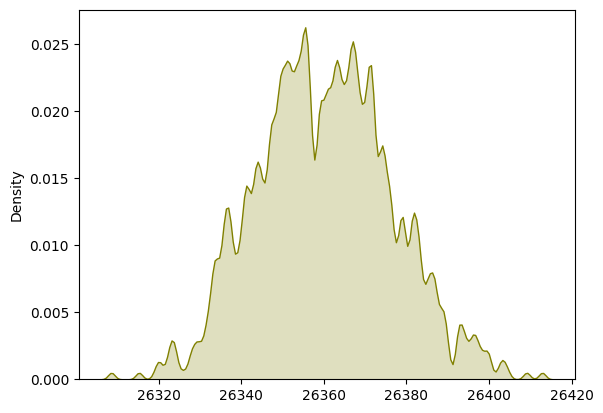

In [14]:
#plotting fair values density
sns.kdeplot(fair_value, fill=True, bw_method=0.05, color="olive")
plt.show()

In [15]:
#testing whether the pricing of the ILB follows a normal distribution
shapiro(fair_value)

ShapiroResult(statistic=0.9979385137557983, pvalue=0.25782695412635803)

In [16]:
#measuring the macaulay durations of the ILBs
x = []
for i in range(1,11):
    x.append(((coupon_with_inflation.iloc[i - 1]*i)/yield_power_arr[i - 1]))

x = pd.DataFrame(x).sum()

mac_dur = []
for i in range(0, 1000):
    mac_dur.append((x[i]/(fair_value[i]*2)))

In [17]:
#compute the yields
data = np.column_stack((-np.array(fair_value), np.array(coupon_with_inflation.T)))
yields = [npf.irr(bond)*2 for bond in data]


In [18]:
#measuring the modified durations of the ILBs
mod_dur = []
for i in range(0,1000):
    mod_dur.append(mac_dur[i]/(1+yields[i]))

In [19]:
#measuring the macaulay convexity of the ILBs
yield_arr = np.array(nss_yc['semi-anual spot rate']) + 1
power_arr = np.array(range(3, 13))
yield_power_arr = np.power(yield_arr, power_arr) 

x = []
for i in range(1, 11):
    x.append((coupon_with_inflation.iloc[i - 1]*i*(i+1))/yield_power_arr[i - 1])

x = pd.DataFrame(x).sum()

conv_mac = []
for i in range(1000):
    conv_mac.append(x[i]/(fair_value[i]*2))

In [20]:
pd.DataFrame([mac_dur, mod_dur, conv_mac], index = ['Macaulay Duration', 'Modified Duration', 'Macaulay Convexity']).T

,Macaulay Duration,Modified Duration,Macaulay Convexity
0,4.311516,4.072172,42.462436
1,4.311820,4.072459,42.469344
2,4.313177,4.073741,42.486017
3,4.313745,4.074277,42.497887
4,4.311496,4.072154,42.463557
...,...,...,...
995,4.311312,4.071980,42.462110
996,4.311785,4.072426,42.468658
997,4.311959,4.072590,42.472776
998,4.311781,4.072422,42.468208


## 2 - Consider the following bond market information for a set of Treasury government bonds:
### a) Estimate the spot yield curve using the Bootstrap method considering bonds 1 to 10

In [21]:
#Create an array
bonds = np.array([
    [1. , 96.6 , 1.50],
    [2. , 93.71 , 1.75],
    [3. , 91.56 , 2.00],
    [4. , 90.24 , 2.25],
    [5. , 89.74 , 2.50],
    [6. , 90.04 , 2.75],
    [7. , 91.09 , 3.00],
    [8. , 92.82 , 3.25],
    [9. , 95.19 , 3.50],
    [10. , 98.14 , 3.75],
    [8. , 98.10 , 4],
])

In [22]:
#Defining 1, 2 and 3 column repectivelly and transposing the array
maturity, prices, coupons = bonds[:-1].T
bonds[:-1].T

array([[ 1.  ,  2.  ,  3.  ,  4.  ,  5.  ,  6.  ,  7.  ,  8.  ,  9.  ,
        10.  ],
       [96.6 , 93.71, 91.56, 90.24, 89.74, 90.04, 91.09, 92.82, 95.19,
        98.14],
       [ 1.5 ,  1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,
         3.75]])

In [23]:
#bootstrapping
cfs = np.tri(10) * coupons.reshape(-1,1) + np.eye(10) * 100
cfs.tolist()

[[101.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.75, 101.75, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [2.0, 2.0, 102.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [2.25, 2.25, 2.25, 102.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [2.5, 2.5, 2.5, 2.5, 102.5, 0.0, 0.0, 0.0, 0.0, 0.0],
 [2.75, 2.75, 2.75, 2.75, 2.75, 102.75, 0.0, 0.0, 0.0, 0.0],
 [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 103.0, 0.0, 0.0, 0.0],
 [3.25, 3.25, 3.25, 3.25, 3.25, 3.25, 3.25, 103.25, 0.0, 0.0],
 [3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 103.5, 0.0],
 [3.75, 3.75, 3.75, 3.75, 3.75, 3.75, 3.75, 3.75, 3.75, 103.75]]

In [24]:
#Compute the inverse of a matrix,apply only to the prices 
#C.𝐷=𝑃
#𝐷=(𝐶^−1).𝑃
dfs =  np.linalg.inv(cfs) @prices
dfs

array([0.95172414, 0.90461408, 0.86124827, 0.8227426 , 0.78916271,
       0.76042723, 0.73611886, 0.71559687, 0.69849544, 0.68423626])

In [25]:
#Confirm if the cashflows and the discount factors would give the same value as the price to confront results
cfs @ dfs

array([96.6 , 93.71, 91.56, 90.24, 89.74, 90.04, 91.09, 92.82, 95.19,
       98.14])

In [26]:
#The results are the same
prices

array([96.6 , 93.71, 91.56, 90.24, 89.74, 90.04, 91.09, 92.82, 95.19,
       98.14])

In [27]:
#Determine the Spots
spots = [pow(1/d, 1/(m+1)) -1 for m,d in enumerate(dfs)] #Determine the the spot rates for every row (Maturity)  
spots

[0.050724637681159424,
 0.051400860610055776,
 0.051051216278840794,
 0.0499871990315186,
 0.048495786203275326,
 0.046703613833167346,
 0.04473810744647344,
 0.042716980245643965,
 0.040675087218742245,
 0.03867431347507222]

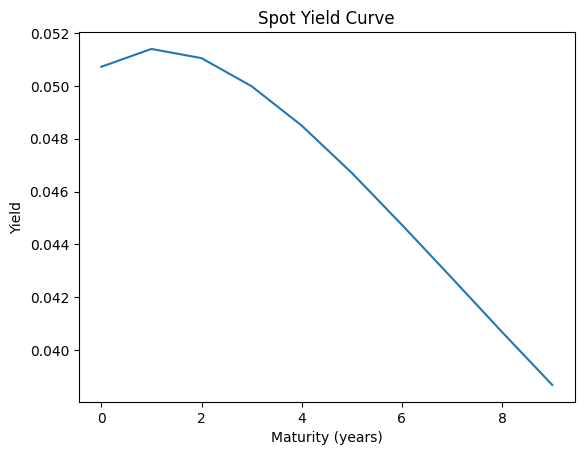

In [28]:
#Display the spot rate in a linear chart
plt.plot(spots, label="Spot Yield Curve")
plt.title('Spot Yield Curve')
plt.xlabel('Maturity (years)')
plt.ylabel('Yield');

### b) Estimate the 3.65-year spot interest rate using the following interpolation method: (i) linear; (ii) cubic. Comment.

In [29]:
#Linear interpolation for 3.65 years
np.interp(3.65, maturity, spots)

0.05035960506808137

In [31]:
#Linear interpolation for 3.65 years
x = maturity
y = spots 

#Define the maturity where we want to find the zero
interpolate_x = 3.65
 
# Finding the interpolation
y_interp = interp1d(x, y) #Define the Spot for the maturity we want to check (3.65) using the linear interpolation
print("Value of the linear interpolation for maturity {} is".format(interpolate_x), 
      y_interp(interpolate_x))

Value of the linear interpolation for maturity 3.65 is 0.05035960506808137


In [32]:
#Cubic interpolation for 3.65 years
y_Cubic = CubicSpline(x, y) #Define the Spot for the maturity we want to check (3.65) using the cubic interpolation
print("Value of the cubic interpolation for maturity {} is".format(interpolate_x),
      y_Cubic(interpolate_x))

Value of the cubic interpolation for maturity 3.65 is 0.05042040475253866


In [33]:
#linear: interpolate along a straight line between neighboring data points
#cubic: use a cubic spline

In [34]:
#The difference on the yield curve for this year is not siggnificantly what suggestt that the Linear interpolation can explain
#the yield curve and in order to have a better view we displayed both of the curves:

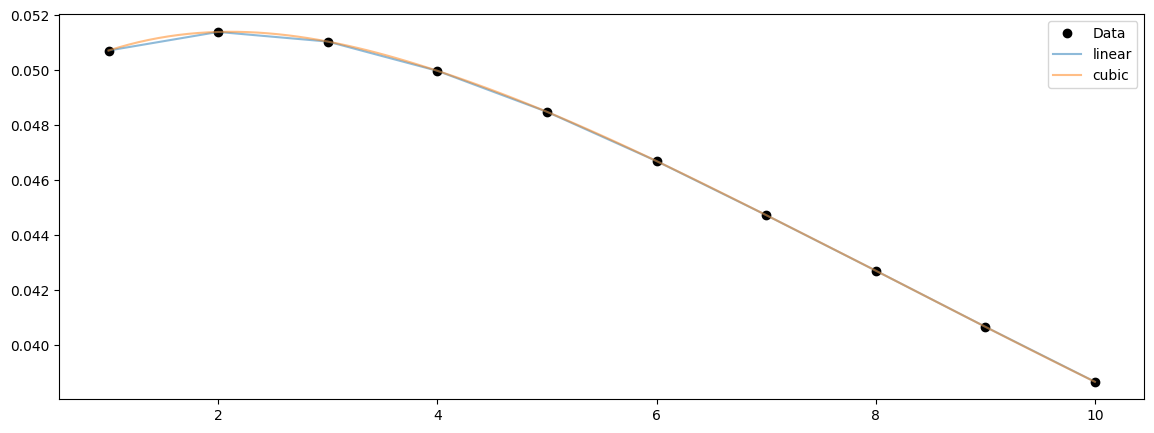

In [35]:
#Create a linear chart with the two interpolations
xx = np.linspace(np.min(x), np.max(x), 100)
plt.figure(figsize=(14,5))

plt.plot(x, y, 'ok', label='Data')
options = ('linear', 'cubic')
for o in options:
    f = interp1d(x, y, kind=o)
    plt.plot(xx, f(xx), label=o, alpha=0.5)
plt.legend();

In [36]:
#Now with both curves displayed we can ensure that the difference between them is very short
#meaning that the linear regression can explain the yild curve

### c) Estimate  the  fair  value  of Bond  11  using  the  yield  curve  estimated  in  (a).  Formulate  a  trading recommendation (buy/sell/hold) for this bond.

In [37]:
#Calculate the fair price
maturity, price, coupon = bonds[-1]
cfs = np.array([4,4,4,4,4,4,4,104]) #Calculate the cashflows for the first 8 years
fairprice = (cfs * dfs[:8]).sum() #Calculate the fair price by multiplying the cashflows by the discounted factors for the first 8 rows because the maturity of the 11 bond is 8 years suming the result of every year at the end
fairprice

97.7262260635001

In [38]:
#Since the fair price is lower than the dirty price for the bond number 11, 
#with the maturity of 8 years and the coupon of 4% we decided to sell it. 

### d) Estimate the yield to maturity of Bond 11.

In [39]:
#Calculate the yield to maturity for the bond 11
def bond_ytm(maturity, price, coupon):
    ytm_func = lambda y : sum([(coupon if n < maturity else coupon + 1)/(1+y)**n #calculating for each maturity the yield rate
                               for n in range(1, maturity +1)]) * 100 - price
    return optimize.newton(ytm_func, 0)

In [40]:
#Define the bond 11
maturity11 = 8
price11 = 98.1
coupon11 = 4

yield11 = (bond_ytm(int(maturity11), price11, coupon11/100)) #calculate the Yield for the bond 11
yield11

0.04285539720963343


## 3 - An asset manager holds the following portfolio of fixed rate Treasury bonds 
### a) Compute the level, slope and curvature durations and $durations of target portfolio.


In [41]:
pd.options.display.float_format = '{:,.2f}'.format

In [42]:
class NSSCurve:
    def __init__(self, params):
        self.params = params

    def zero(self, m):
        def nss(p, term):
            beta0, beta1, beta2, beta3, tau1, tau2 = p
            return (beta0 
                    + beta1*(1 - np.exp(-term/tau1))/(term/tau1) 
                    + beta2*((1 - np.exp(-term/tau1))/(term/tau1) - np.exp(-term/tau1)) 
                    + beta3*((1 - np.exp(-term/tau2))/(term/tau2) - np.exp(-term/tau2)))
        return nss(self.params, m)


class Bond:
    def __init__(self, data):
        self.maturity, self.coupon, self.quantity = data
        self.maturity = datetime.strptime(self.maturity, '%d/%m/%Y').date()
    
    def dfs(self):
        return np.array([np.exp(-crv.zero(m)*m) for m in self.cfs().yf])
    
    def price(self):
        return self.cfs().cf @ self.dfs()

    def cfs(self):
        paymentDate = self.maturity
        cfs = []
        while paymentDate > today:
            cfs.append([paymentDate, self.coupon])
            paymentDate = date(paymentDate.year - 1, paymentDate.month, paymentDate.day)
        cfs = cfs[:: -1]
        cfs[-1][1] += 100
        df = pd.DataFrame(cfs, columns=['date', 'cf'])
        df['yf'] = df.date.apply(lambda x:(x - today).days/365.25).values
        return df
    
    def nssDolDurations(self):
        beta0, beta1, beta2, beta3, tau1, tau2 = crv.params
        elements = [*zip(self.cfs().yf, self.cfs().cf, crv.zero(self.cfs().yf))]
        beta0_sens = -np.sum([cf*t*np.exp(-t*r0t) for t, cf, r0t in elements])
        beta1_sens = -np.sum([cf*t*(1 - np.exp(-t/tau1))/(t/tau1)*np.exp(-t*r0t) for t, cf, r0t in elements])
        beta2_sens = -np.sum([cf*t*((1 - np.exp(-t/tau1))/(t/tau1) - np.exp(-t/tau1))*np.exp(-t*r0t)  for t, cf, r0t in elements])
        beta3_sens = -np.sum([cf*t*((1 - np.exp(-t/tau2))/(t/tau2) - np.exp(-t/tau2))*np.exp(-t*r0t) for t, cf, r0t in elements])
        return np.array([beta0_sens, beta1_sens, beta2_sens, beta3_sens])

    def nssDurations(self):
        return -self.nssDolDurations()/(self.price())


class Portfolio:
    def __init__(self, bonds):
        self.bonds = bonds
        self.quantities = np.array(bonds)[:, 2].astype(float)
        self.weights = self.quantities/self.quantities.sum()

    def nssDolDurations(self):
        return np.array([Bond(row).nssDolDurations() for row in self.bonds]).sum(0)
    
    def nssDurations(self):
        return self.weights @ np.array([Bond(row).nssDurations() for row in self.bonds])
    
    def price(self):
        return np.array([Bond(row).price()*Bond(row).quantity for row in self.bonds]).sum()
    
    def params(self):
        return np.hstack([self.nssDolDurations(), self.price()])
    
    def table(self):
        df = pd.DataFrame(self.bonds, columns = ['Maturity', 'Coupon', 'Quantity'])
        df['Price'] = [Bond(row).price() for row in self.bonds]
        return df


In [43]:
today = date(2022, 2, 9)

bonds = [
    ['01/12/2025', 4.0, 10000],
    ['04/12/2026', 7.75, 250000],
    ['07/12/2027', 4.0, 50000],
    ['10/12/2028', 7.0, 100000],
    ['03/12/2029', 5.75, 10000],
    ['10/12/2030', 5.5, 200000],
    ['01/12/2032', 4.0, 15000],
    ['03/12/2035', 4.75, 10000],
    ['07/12/2030', 4.5, 30000],
    ['01/12/2045', 5.0, 75000],
    ['07/12/2050', 4.5, 100000],
    ['01/12/2051', 4.0, 10000],
    ['07/12/2052', 5.0, 10000]
]

p = [0.059, -0.016, -0.005, 0.01, 5, 0.5]
crv = NSSCurve(p)


In [44]:
#info bonds in the target portfolio
tot_q = np.array(bonds)[:, 2].astype(float).sum()
x = []

for i in range(len(bonds)):
    bond = Bond(bonds[i])
    x.append([bond.price(), bond.quantity, bond.quantity/tot_q, *bond.nssDolDurations(), *bond.nssDurations()])

df = pd.DataFrame(x, columns = ['Price', 'Quantity', 'Weight', 'S0', 'S1', 'S2', 'S3', 'D0', 'D1', 'D2', 'D3'])
df
#  S:$duration,  D:duration

,Price,Quantity,Weight,S0,S1,S2,S3,D0,D1,D2,D3
0,97.67,10000,0.01,-349.55,-246.92,-79.98,-47.38,3.58,2.53,0.82,0.49
1,113.13,250000,0.29,-473.62,-312.05,-118.72,-54.08,4.19,2.76,1.05,0.48
2,95.69,50000,0.06,-503.00,-303.70,-136.95,-46.59,5.26,3.17,1.43,0.49
3,112.15,100000,0.11,-635.60,-363.19,-177.49,-53.91,5.67,3.24,1.58,0.48
4,105.13,10000,0.01,-680.28,-362.61,-195.07,-50.74,6.47,3.45,1.86,0.48
5,103.33,200000,0.23,-741.99,-371.25,-214.92,-49.97,7.18,3.59,2.08,0.48
6,90.72,15000,0.02,-796.57,-351.19,-230.25,-44.08,8.78,3.87,2.54,0.49
7,95.32,10000,0.01,-971.67,-376.11,-267.75,-46.15,10.19,3.95,2.81,0.48
8,96.22,30000,0.03,-709.35,-351.92,-206.36,-46.70,7.37,3.66,2.14,0.49
9,94.34,75000,0.09,"-1,299.81",-378.31,-294.80,-45.57,13.78,4.01,3.12,0.48


In [45]:
portfolio = Portfolio(bonds)

pd.DataFrame({
    'Duration': portfolio.nssDurations(),
    '$Duration': portfolio.nssDolDurations(),
}, index = ['Beta0', 'Beta1', 'Beta2', 'Beta3']).T


,Beta0,Beta1,Beta2,Beta3
Duration,7.74,3.38,1.93,0.48
$Duration,"-11,121.15","-4,450.72","-2,738.56",-609.20


In [46]:
#price of the target portfolio
portfolio.price()

89536545.24706112

### b) Compute the level, slope and curvature durations and $durations of the hedging assets.


In [47]:
hedges = [
    ['11/04/2026', 4.5, 1],
    ['28/12/2032', 5.0, 1],
    ['06/05/2035', 6.0, 1],
    ['10/10/2040', 6.0, 1],
    ['10/10/2051', 6.5, 1]
]

In [48]:
#price and risk measures of hedging assets
risk_mes = []

for i in range(len(hedges)):   
    hedge = Bond(hedges[i])
    risk_mes.append([hedge.price(), *hedge.nssDolDurations(), *hedge.nssDurations()])

pd.DataFrame(risk_mes, index = ['H1', 'H2', 'H3', 'H4', 'H5'], columns = ['B0', 'S0', 'S1', 'S2', 'S3', 'D0', 'D1', 'D2', 'D3'])   
#  B0:price,  S:$duration,  D:duration

,B0,S0,S1,S2,S3,D0,D1,D2,D3
H1,102.17,-383.11,-263.15,-91.43,-48.00,3.75,2.58,0.89,0.47
H2,98.67,-844.61,-375.79,-243.19,-47.89,8.56,3.81,2.46,0.49
H3,111.10,"-1,021.84",-413.42,-284.22,-51.79,9.20,3.72,2.56,0.47
H4,108.66,"-1,264.47",-424.91,-317.56,-52.01,11.64,3.91,2.92,0.48
H5,116.01,"-1,650.49",-455.38,-351.20,-55.50,14.23,3.93,3.03,0.48


In [49]:
hedge = Portfolio(hedges)

pd.DataFrame({
    'Duration': hedge.nssDurations(),
    '$Duration': hedge.nssDolDurations(),
}, index = ['Beta0', 'Beta1', 'Beta2', 'Beta3']).T

,Beta0,Beta1,Beta2,Beta3
Duration,9.47,3.59,2.37,0.48
$Duration,"-5,164.52","-1,932.65","-1,287.59",-255.19


### c) Estimate the hedging portfolio holdings assuming the hedger wants to implement a self-financing (full) hedging strategy.


In [50]:
X = portfolio.params()
H = np.array([[*-Bond(row).nssDolDurations(), Bond(row).price()] for row in hedges]).T
res = np.linalg.solve(H, -X)
hedgeRes = [h[:2] + [weights] for h, weights in zip(hedges, res)]
hedgePortfolio = Portfolio(hedgeRes)
hedgePortfolio.table()

,Maturity,Coupon,Quantity,Price
0,11/04/2026,4.50,"-57,723.79",102.17
1,28/12/2032,5.00,"14,839,427.01",98.67
2,06/05/2035,6.00,"-23,655,567.79",111.10
3,10/10/2040,6.00,"13,167,453.70",108.66
4,10/10/2051,6.50,"-3,022,797.80",116.01


In [51]:
#hedging portfolio price
hedgePortfolio.price()

-89536545.24706244

In [52]:
total = pd.DataFrame([
    portfolio.price(),
    hedgePortfolio.price()],
    index = ['Portfolio', 'Hedge'],
    columns = ['Price'])
total.loc['Total'] = total.sum()
total

,Price
Portfolio,"89,536,545.25"
Hedge,"-89,536,545.25"
Total,-0.00


### d) Assume that immediately after the hedging strategy was setup, the yield curve changed and is now given by the following set of NSS parameters:
### beta0, beta1, beta2, beta3, tau1, tau2 = [0.065, -0.01, 0.001, 0.02, 5, 0.5]
### i. Estimate  the  impact  of  this  yield  curve  shift  on  the  Target  Portfolio assuming  no  hedging strategy had been put in place. Discuss the results.


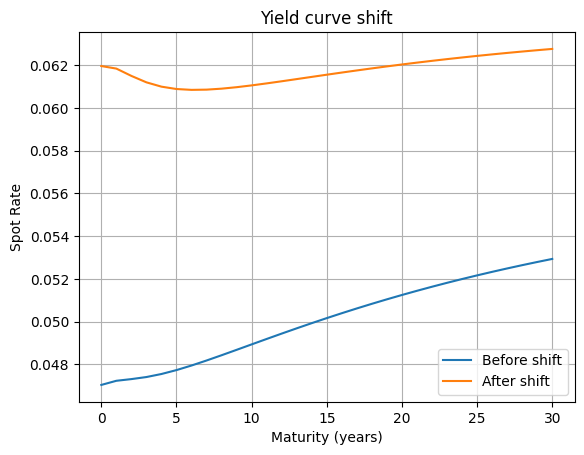

In [53]:
graph_tenors = np.linspace(1, 15, 31)
df = pd.DataFrame({
    'previous':[NSSCurve([0.059, -0.016, -0.005, 0.01, 5, 0.5]).zero(tenor) for tenor in graph_tenors],
    'now':[NSSCurve([0.065, -0.01, 0.001, 0.02, 5, 0.5]).zero(tenor) for tenor in graph_tenors]
})
plt.plot(df)
plt.title('Yield curve shift')
plt.xlabel('Maturity (years)')
plt.ylabel('Spot Rate')
plt.legend(['Before shift', 'After shift'])
plt.grid()


In [54]:
crv = NSSCurve([0.059, -0.016, -0.005, 0.01, 5, 0.5])
df = pd.DataFrame(columns = ['Portfolio'])
df.loc['Before shift'] = [portfolio.price()]

crv = NSSCurve([0.065, -0.01, 0.001, 0.02, 5, 0.5])
df.loc['After shift'] = [portfolio.price()]

df.loc['Change'] = df.diff().iloc[-1]
df


,Portfolio
Before shift,"89,536,545.25"
After shift,"82,702,058.70"
Change,"-6,834,486.55"


In [55]:
#percentage impact of yield curve shift on the Target Portfolio
(df.Portfolio[2]/df.Portfolio[0])*100


-7.6331809854246755

### ii. Estimate the impact of this yield curve shift on the global portfolio (target bond portfolio plus the hedging instruments) and discuss the performance of the hedging strategy. 


In [56]:
crv = NSSCurve([0.059, -0.016, -0.005, 0.01, 5, 0.5])
df = pd.DataFrame(columns = ['Portfolio', 'Hedge', 'Global'])
df.loc['Before shift'] = [portfolio.price(), hedgePortfolio.price(), portfolio.price() + hedgePortfolio.price()]

crv = NSSCurve([0.065, -0.01, 0.001, 0.02, 5, 0.5])
df.loc['After shift'] = [portfolio.price(), hedgePortfolio.price(), portfolio.price() + hedgePortfolio.price()]

df.loc['Change'] = df.diff().iloc[-1]
df

,Portfolio,Hedge,Global
Before shift,"89,536,545.25","-89,536,545.25",-0.00
After shift,"82,702,058.70","-89,617,259.98","-6,915,201.28"
Change,"-6,834,486.55","-80,714.73","-6,915,201.28"


In [57]:
#percentage impact of yield curve shift on the Global Portfolio
(df.Global[2]/df.Portfolio[0])*100

-7.7233282299574855